In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load data here
df = pd.read_csv('Titanic-Dataset.csv')
print("first 5 rows:")
print(df.head())


first 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [34]:
# only fill age to average
df['Age'] = df['Age'].fillna(df['Age'].median())

# Sex (Male/Female) Numbers (0/1) change it
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# put only important column
# Titanic dataset age, gender, pclass
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features]
y = df['Survived']

print("Cleaning done!")

Cleaning done!


In [35]:
# Data split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# check the accuracy
y_pred = model.predict(X_test)
print(f"Model ki Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Model ki Accuracy: 81.01%


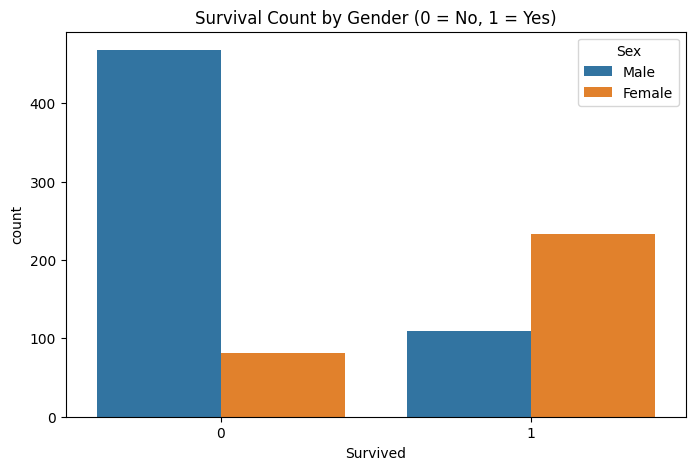

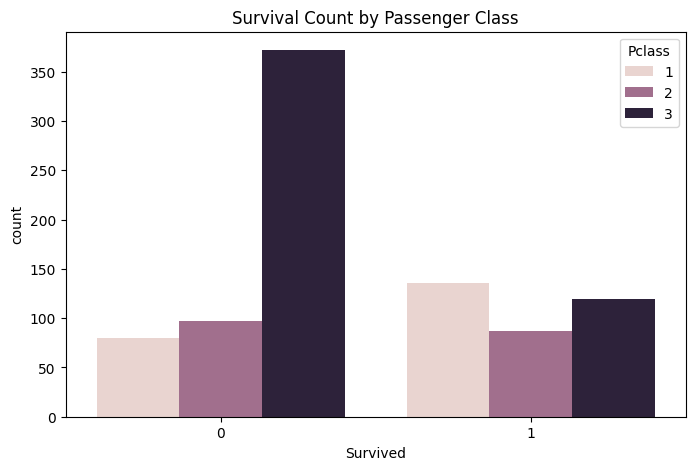

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graph 1: predict servival rate based on gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender (0 = No, 1 = Yes)')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

# Graph 2: Pclass (Ticket Class) based on it
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()